# Ising model code

Here we just code Metropolis algorithm for the Ising model and generate a bunch of samples for train/predict ml stuff. The code for the Ising model is not an original piece a has been taken elsewhere.

Hamiltonian for the model is
$ H  = -\sum_{<ij>} \sigma_i \sigma_j$.

In [1]:
from __future__ import division
%matplotlib inline
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt

In [2]:
def initState(N):   # generates random spin state
    state = 2*np.random.randint(2, size=(N,N))-1
    return state

In [6]:
def mcStep(config, beta): # Monte Carlo Metropolis step
    for i in range(N):
        for j in range(N):
                a = np.random.randint(0, N)
                b = np.random.randint(0, N)
                s =  config[a, b]
                nb = config[(a+1)%N,b] + config[a,(b+1)%N] + config[(a-1)%N,b] + config[a,(b-1)%N] 
                # here %N helps to make the geometry toric
                cost = 2*s*nb
                if cost < 0:
                    s *= -1
                elif rand() < np.exp(-cost*beta):
                    s *= -1
                config[a, b] = s
    return config

In [7]:
def calcEnergy(config):
    #energy of a given configuration
    energy = 0
    for i in range(len(config)):
        for j in range(len(config)):
            S = config[i,j]
            nb = config[(i+1)%N, j] + config[i,(j+1)%N] + config[(i-1)%N, j] + config[i,(j-1)%N]
            energy += -nb*S
    return energy/4.

def calcMag(config):
    #magnetization of a given configuration
    mag = np.sum(config)
    return mag

In [109]:
## change these parameters for a smaller (faster) simulation 
nt      = 800         #  number of temperature points
N       = 16         #  size of the lattice, N x N
eqSteps = 1024       #  number of MC sweeps for equilibration
mcSteps = 1024       #  number of MC sweeps for calculation

T       = np.linspace(1.53, 3.28, nt); 
E,M,C,X = np.zeros(nt), np.zeros(nt), np.zeros(nt), np.zeros(nt)
n1, n2  = 1.0/(mcSteps*N*N), 1.0/(mcSteps*mcSteps*N*N) 
# divide by number of samples, and by system size to get intensive values

In [9]:
for tt in range(nt):
    E1 = M1 = E2 = M2 = 0
    config = initState(N)
    beta=1.0/T[tt]; beta2=beta*beta;
    
    for i in range(eqSteps):         # equilibrate
        mcStep(config, beta)           # Monte Carlo moves

    for i in range(mcSteps):
        mcStep(config, beta)           
        Ene = calcEnergy(config)     # calculate the energy
        Mag = calcMag(config)        # calculate the magnetisation

        E1 = E1 + Ene
        M1 = M1 + Mag
        M2 = M2 + Mag*Mag 
        E2 = E2 + Ene*Ene

    E[tt] = n1*E1 # averaged!
    M[tt] = n1*M1
    C[tt] = (n1*E2 - n2*E1*E1)*beta2
    X[tt] = (n1*M2 - n2*M1*M1)*beta

KeyboardInterrupt: 

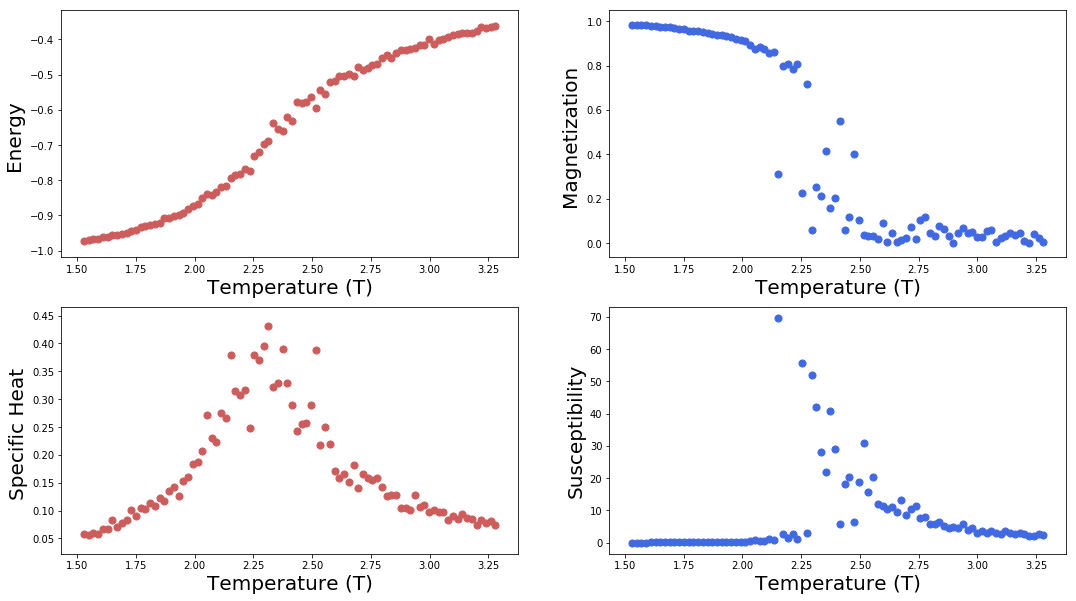

In [36]:
f = plt.figure(figsize=(18, 10)); # plot the calculated values    

sp =  f.add_subplot(2, 2, 1 );
plt.scatter(T, E, s=50, marker='o', color='IndianRed')
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Energy ", fontsize=20);         plt.axis('tight');

sp =  f.add_subplot(2, 2, 2 );
plt.scatter(T, abs(M), s=50, marker='o', color='RoyalBlue')
plt.xlabel("Temperature (T)", fontsize=20); 
plt.ylabel("Magnetization ", fontsize=20);   plt.axis('tight');

sp =  f.add_subplot(2, 2, 3 );
plt.scatter(T, C, s=50, marker='o', color='IndianRed')
plt.xlabel("Temperature (T)", fontsize=20);  
plt.ylabel("Specific Heat ", fontsize=20);   plt.axis('tight');   

sp =  f.add_subplot(2, 2, 4 );
plt.scatter(T, X, s=50, marker='o', color='RoyalBlue')
plt.xlabel("Temperature (T)", fontsize=20); 
plt.ylabel("Susceptibility", fontsize=20);   plt.axis('tight');

# Preparing test/train configurations

In [110]:
import pandas as pd
from numpy.random import randint

df = pd.DataFrame(columns=['Configuration', 'Phase', 'Inverse temperature'])

for tt in range(nt):

    E1 = M1 = E2 = M2 = 0
    config = initState(N)
    beta=1.0/T[tt]
    
    if (T[tt] < 2.269185314):
        phase = 0
    else:
        phase = 1
    
    for i in range(eqSteps):         # equilibrate
        mcStep(config, beta)           # Monte Carlo moves
    
    
    df.loc[tt] = [config] + [phase] + [beta]
    






In [112]:
df.tail()

,Configuration,Phase,Inverse temperature
795,"[[1, 1, 1, -1, 1, 1, 1, -1, 1, -1, -1, -1, -1,...",1,0.305695
796,"[[-1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, 1...",1,0.305490
797,"[[1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, -1, 1, 1,...",1,0.305286
798,"[[1, -1, -1, 1, -1, -1, -1, -1, 1, 1, -1, -1, ...",1,0.305082
799,"[[1, 1, -1, -1, 1, -1, -1, 1, 1, -1, 1, 1, -1,...",1,0.304878


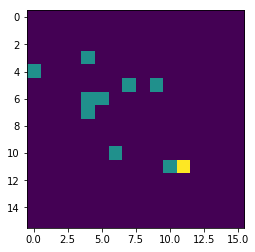

In [118]:
plt.imshow(df.Configuration[0] - df.Configuration[100])

In [122]:
df.to_csv('iCloud/dev/Ising-m/train_test.csv')